In [1]:
import pandas as pd
import scipy as scp
import copy
from IPython.core.display import display, HTML
from Core.MeasuresManager import MeasuresManager

from IPython.display import clear_output
from ipywidgets import interact, interactive

import matplotlib.pyplot as plt
from ipywidgets import widgets
from IPython.display import display
from UI.ConverterUI import ConverterUI

# from scipy.stats import spearmanr
DATA_DIR = "data/"

In [2]:
data = pd.read_csv(DATA_DIR + 'seps_utf.csv', ';')
data = data[data.columns.drop(list(data.filter(regex='Unnamed')))]
data = data.drop(['Оценка', 'Группа'], 1)
data = data.dropna()
measures_manager = MeasuresManager(data, 'html')

measures_manager.raw_df

,Содержание дисциплины соответствовало заявленному в программе дисциплины,Место дисциплины в программе обучения обосновано,Учебная нагрузка дисциплины посильная,Уровень нагрузки в ходе обучения равномерный,Занятия проводились согласно расписанию,Доступ к материалам дисциплины предоставлялся вовремя,О заменах и переносах (при наличии таковых) сообщалось заранее в доступной форме,Перед изучением дисциплины [были ли у Вас соответствующие теоретические знания],Перед изучением дисциплины [был ли у Вас соответствующий практический опыт],"Оцените, пожалуйста, [приблизительный уровень Вашего присутствия на занятиях (в %)]",...,При изложении материала прослеживались связи [между этой и другими дисциплинами программы обучения],Преподаватель динамично реагировал на вопросы и потребности студентов,Готовы ли Вы охарактеризовать поведение уравновешенным и отношение к студентам объективным [говоря о преподавателе],Методы оценивания были понятны и обоснованы?,Вы получали вовремя результаты оценивания?,Давал ли преподаватель полезную обратную связь по результатам оценивания?,Методические указания содержали полезные сведения,Требуемый объем работ,Преподаватель эффективно помогал в решении возникавших проблем,Практические/лабораторные задания Вы выполняли
0,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Нет,Нет,0-30,...,"Да, регулярно",Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,с небольшой помощью
1,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Нет,Нет,90-100,...,Весьма эпизодически,Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,самостоятельно
2,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Не определился,Полностью согласен,Полностью согласен,Да,Нет,60-74,...,Весьма эпизодически,Да,Нет,Да,Да,Да,Некоторые рекомендации были полезны,посильный,Иногда,самостоятельно
3,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Да,31-59,...,"Да, регулярно",Да,Да,Да,Да,Я не спрашивал,"Однозначно, да",посильный,Всегда,с небольшой помощью
4,Полностью согласен,Согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Да,75-89,...,"Да, регулярно",Да,Да,Да,Да,Иногда баллы за электронные лабораторные работ...,"Однозначно, да",посильный,Всегда,с небольшой помощью
5,Согласен,Не определился,Согласен,Согласен,Согласен,Согласен,Согласен,Нет,Нет,75-89,...,Весьма эпизодически,Да,Да,Да,Да,Да,Некоторые рекомендации были полезны,посильный,Всегда,с небольшой помощью
6,Полностью согласен,Полностью согласен,Полностью согласен,Не определился,Полностью согласен,Полностью согласен,Согласен,Нет,Нет,0-30,...,"Да, регулярно",Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,с небольшой помощью
7,Полностью согласен,Не определился,Согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Нет,90-100,...,Весьма эпизодически,Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,как команда
8,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Нет,31-59,...,Весьма эпизодически,Да,Да,Да,Да,Да,"Однозначно, да",посильный,Всегда,самостоятельно
9,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Полностью согласен,Да,Нет,31-59,...,Весьма эпизодически,Да,Да,Да,Да,Да,Некоторые рекомендации были полезны,посильный,Всегда,самостоятельно


In [5]:
display(HTML(measures_manager.f_signs_names()))

In [9]:
# Experiments with widgets. Ignore this cell
# from ipywidgets import widgets


# text_wid = widgets.Text()
# # display(text_wid)

# def text_handler(sender):
#     print(text_wid.value)

# text_wid.on_submit(text_handler)

Dropdown(description='Choose sign: ', index=3, layout=Layout(width='100%'), options=('Содержание дисциплины со…

['Содержание дисциплины соответствовало заявленному в программе дисциплины', 'Место дисциплины в программе обучения обосновано', 'Учебная нагрузка дисциплины посильная', 'Уровень нагрузки в ходе обучения равномерный', 'Занятия проводились согласно расписанию', 'Доступ к материалам дисциплины предоставлялся вовремя', 'О заменах и переносах (при наличии таковых) сообщалось заранее в доступной форме', 'Перед изучением дисциплины [были ли у Вас соответствующие теоретические знания]', 'Перед изучением дисциплины [был ли у Вас соответствующий практический опыт]', 'Оцените, пожалуйста, [приблизительный уровень Вашего присутствия на занятиях (в %)]', 'Оцените, пожалуйста, [свою успешность в дисциплине (в баллах)]', 'Вы активно участвовали в аудиторных занятиях?', 'Вы изучали самостоятельно материалы по дисциплине?', 'Вы удовлетворены своим прогрессом в дисциплине?', 'Считаете ли Вы, что дисциплина хорошо структурирована с точки зрения баланса лекций, практик, лабораторных, самостоятельной рабо

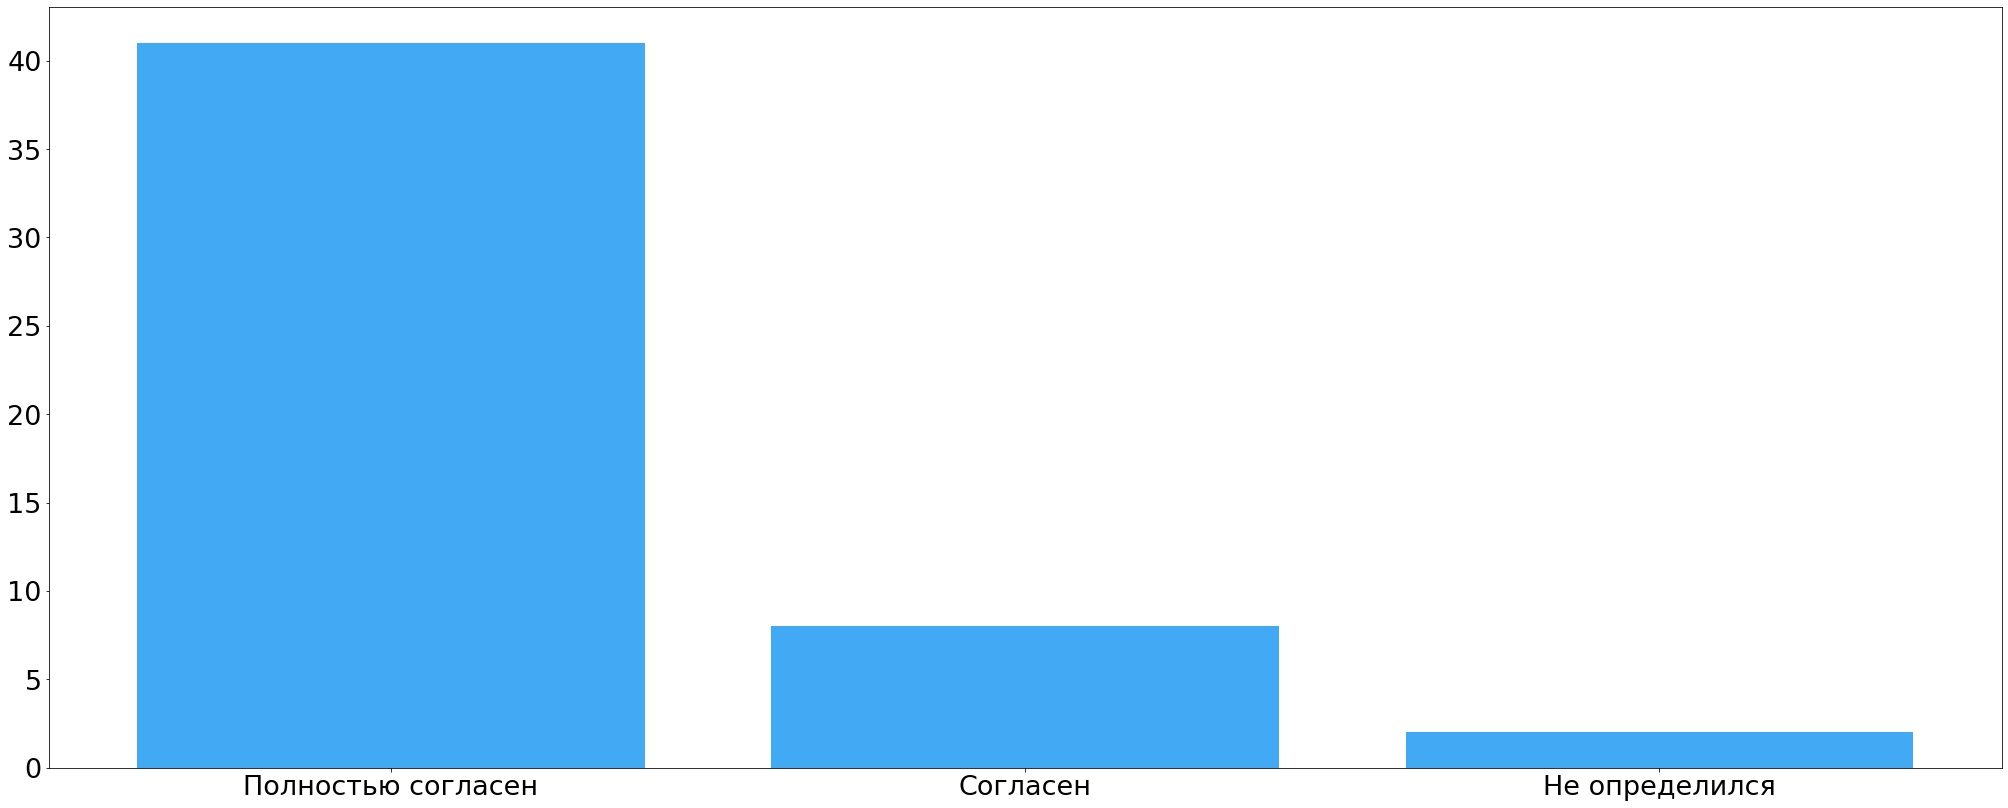

In [7]:
# print(measures_manager.signs)
# display(HTML(measures_manager.signs))
signs_dropdown = widgets.Dropdown(
    options=measures_manager.raw_signs_names(),
    value=measures_manager.raw_signs_names()[0],
    description='Choose sign: ',
    disabled=False,
    style={'description_width': 'initial', 'width': '500px'},
    layout={'width':'100%'}
)
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        clear_output(wait=True)
        display(signs_dropdown)
        display(HTML(measures_manager[change['new']].f_get_stat_info()))

signs_dropdown.observe(on_change)
display(signs_dropdown)
display(HTML(measures_manager.signs[0].f_get_stat_info()))

In [11]:
converter_ui = ConverterUI(measures_manager)
converter_ui.ui()

Dropdown(description='Choose sign: ', layout=Layout(width='100%'), options=('Содержание дисциплины соответство…

Dropdown(description='Change measure from <b><u>Nominal</u></b> to:', layout=Layout(height='37px', width='100%…

VBox()

Button(description='Convert measure', disabled=True, style=ButtonStyle())

[]
['Содержание дисциплины соответствовало заявленному в программе дисциплины', 'Место дисциплины в программе обучения обосновано', 'Учебная нагрузка дисциплины посильная', 'Уровень нагрузки в ходе обучения равномерный', 'Занятия проводились согласно расписанию', 'Доступ к материалам дисциплины предоставлялся вовремя', 'О заменах и переносах (при наличии таковых) сообщалось заранее в доступной форме', 'Перед изучением дисциплины [были ли у Вас соответствующие теоретические знания]', 'Перед изучением дисциплины [был ли у Вас соответствующий практический опыт]', 'Оцените, пожалуйста, [приблизительный уровень Вашего присутствия на занятиях (в %)]', 'Оцените, пожалуйста, [свою успешность в дисциплине (в баллах)]', 'Вы активно участвовали в аудиторных занятиях?', 'Вы изучали самостоятельно материалы по дисциплине?', 'Вы удовлетворены своим прогрессом в дисциплине?', 'Считаете ли Вы, что дисциплина хорошо структурирована с точки зрения баланса лекций, практик, лабораторных, самостоятельной р

In [10]:
input_w = widgets.BoundedFloatText(
    value=7.5,
    min=0,
    step=1,
    description='Text:',
    disabled=False
)
display(input_w)

BoundedFloatText(value=7.5, description='Text:', step=1.0)